In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
pr = pd.read_csv('new_olist_products_dataset.csv')

In [2]:
oid = pd.read_csv('new_olist_order_items_dataset.csv')

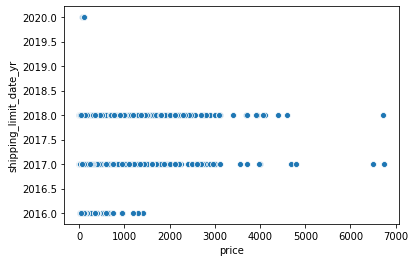

In [3]:
sns.scatterplot('price','shipping_limit_date_yr',data=oid)

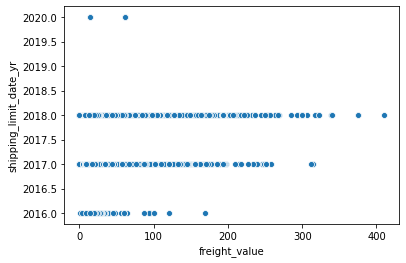

In [4]:
sns.scatterplot('freight_value','shipping_limit_date_yr',data=oid)

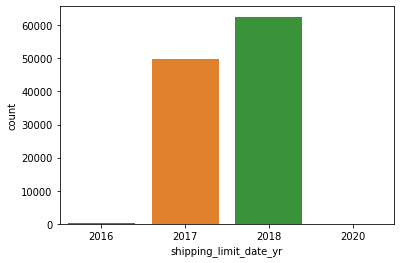

In [5]:
sns.countplot('shipping_limit_date_yr',data=oid)
# shipping yr limit increases

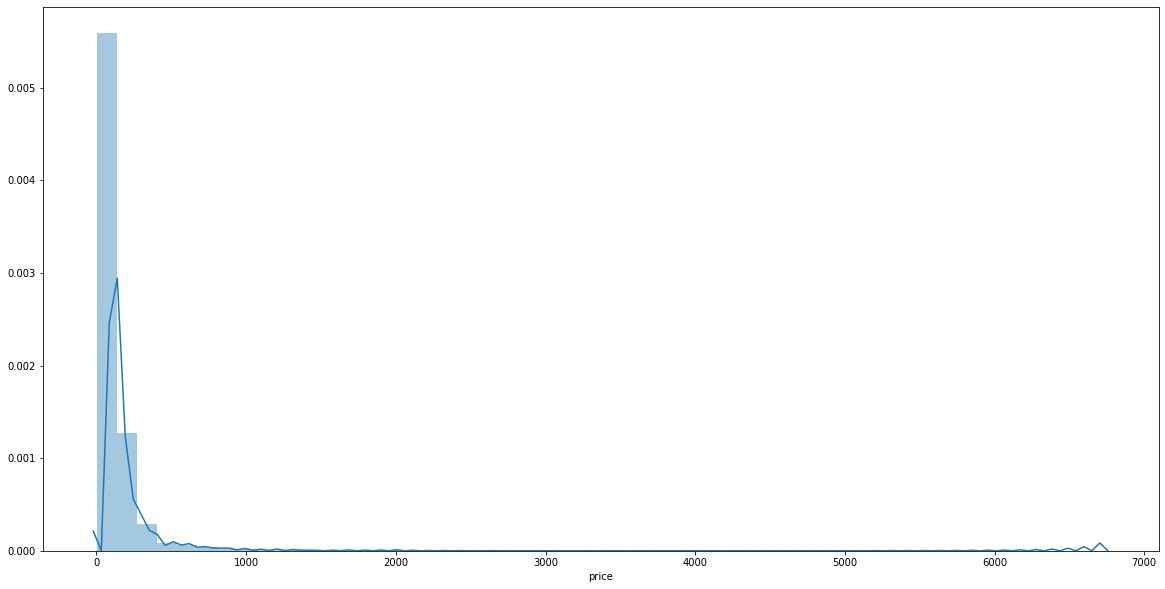

In [6]:
sns.distplot(oid['price'])
fig = plt.gcf()
fig.set_size_inches(20,10)

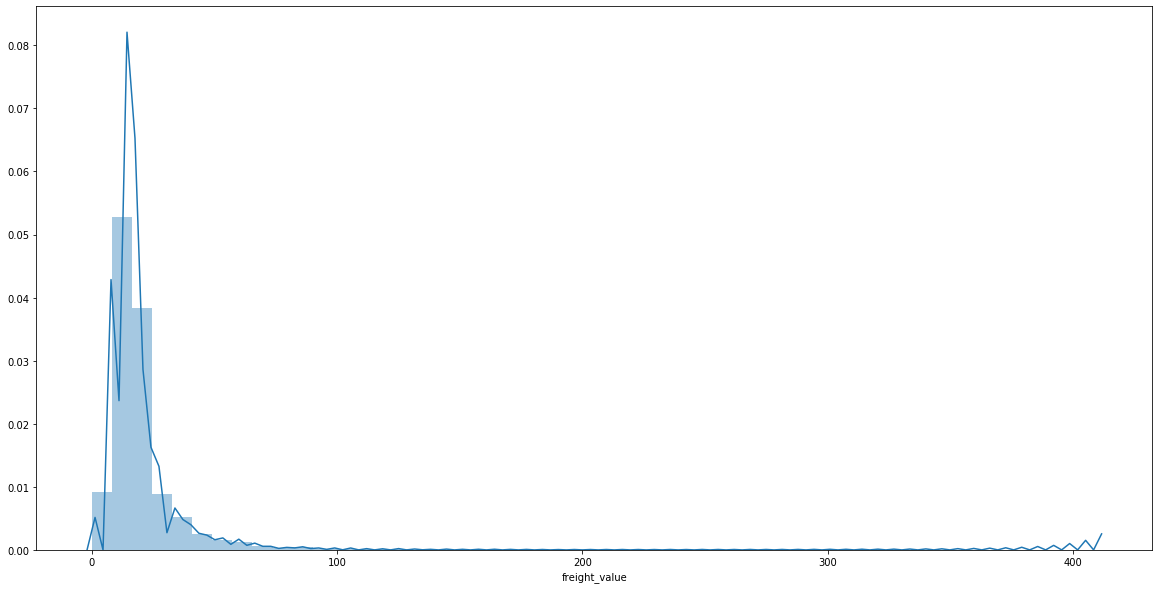

In [7]:
sns.distplot(oid['freight_value'])
fig = plt.gcf()
fig.set_size_inches(20,10)

In [8]:
pr_oid=oid.merge(pr,on='product_id')

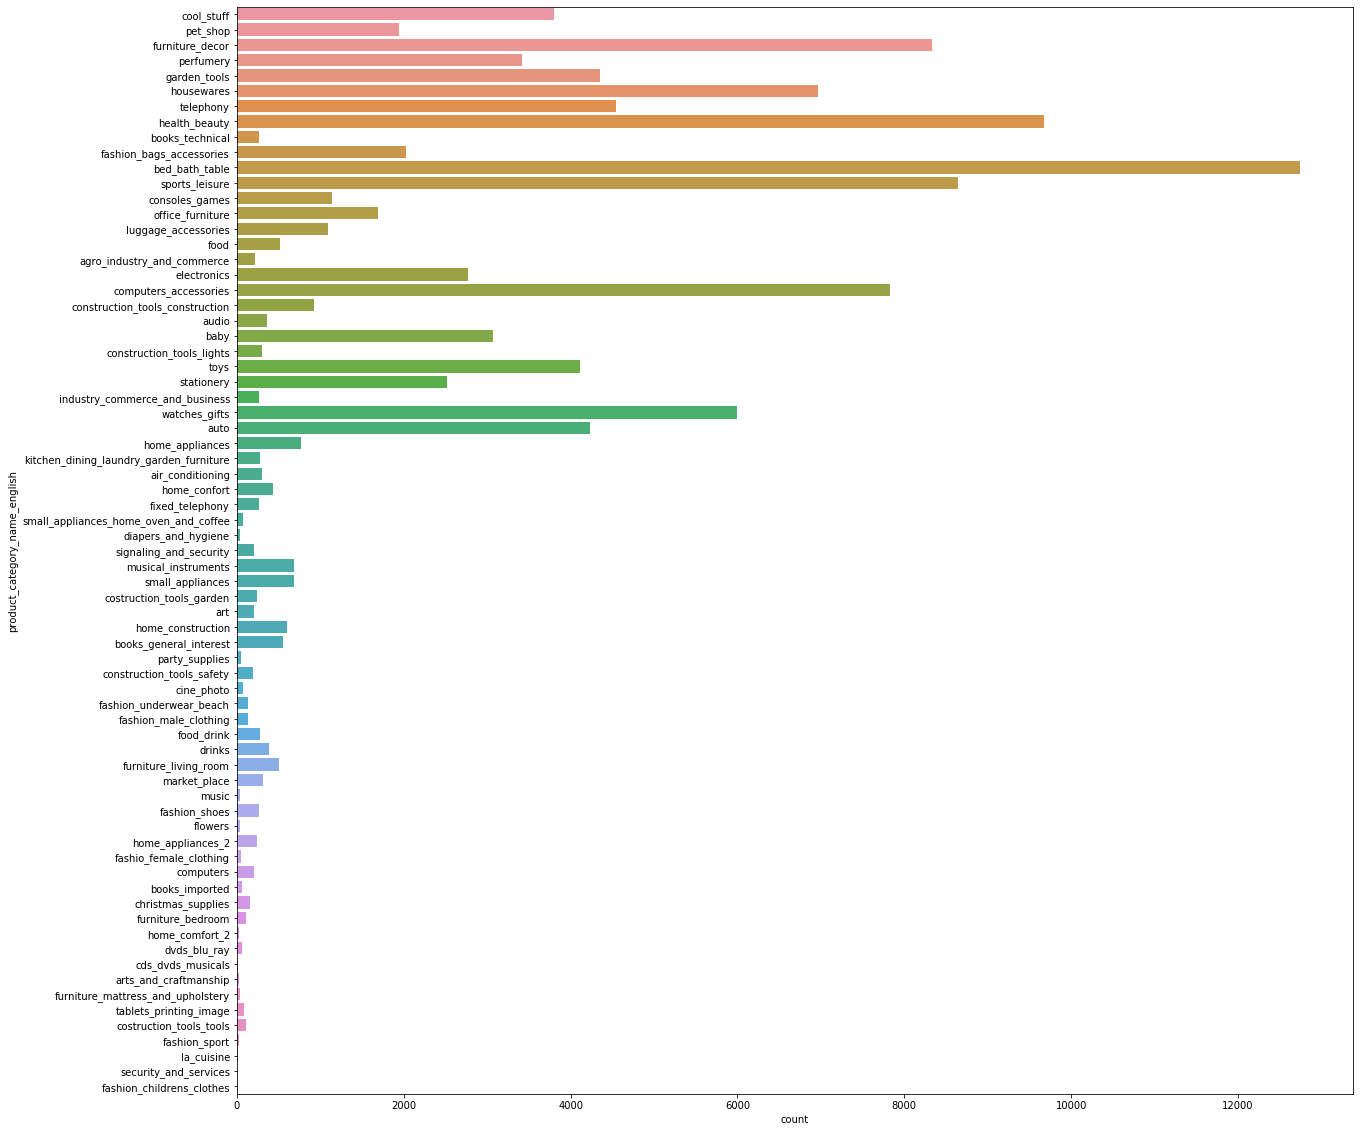

In [9]:
sns.countplot(y=pr_oid['product_category_name_english'])

fig = plt.gcf()
fig.set_size_inches(20,20)
#most popular product categories are bed_bath_table, health_beauty, furniture_decor, sports_leisure

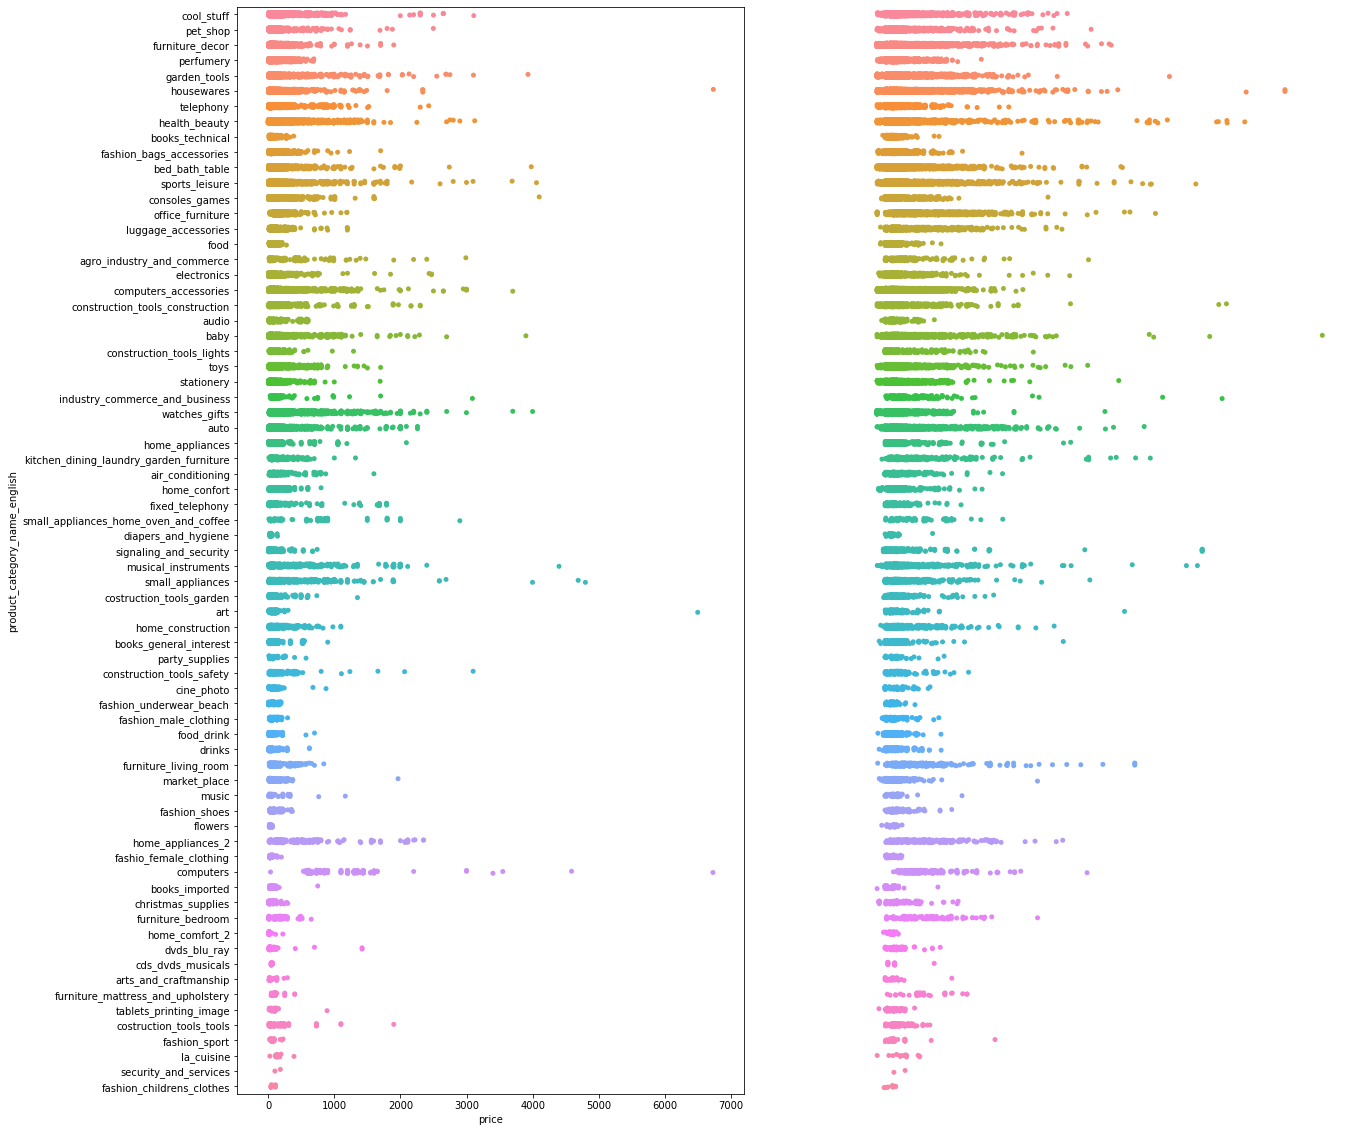

In [10]:
fig, ax =plt.subplots(1,2)
y="product_category_name_english"
sns.stripplot(x='price',y=y,  data=pr_oid,ax=ax[0])
sns.stripplot(x='freight_value',y=y,  data=pr_oid,ax=ax[1]).axis('off')
# in 2nd plot x axis is freight value 
fig.set_size_inches(20,20)
plt.show()

In [11]:
osd = pd.read_csv('new_olist_sellers_dataset.csv')

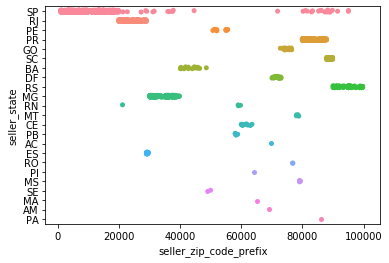

<Figure size 720x1440 with 0 Axes>

In [12]:
sns.stripplot(y='seller_state',x='seller_zip_code_prefix',data=osd)
plt.figure(figsize=(10,20))
plt.show()
#most of the sellers are from sp, MG, 

In [13]:
pr_oid_osd = osd.merge(pr_oid, on='seller_id')

In [14]:
og = pd.read_csv('new_olist_geolocation_dataset.csv')

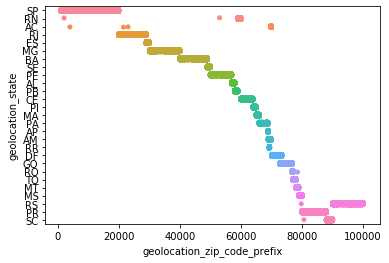

<Figure size 720x1440 with 0 Axes>

In [15]:
sns.stripplot(y='geolocation_state',x='geolocation_zip_code_prefix',data=og)
plt.figure(figsize=(10,20))
plt.show()

In [16]:
ocd = pd.read_csv('new_olist_customers_dataset.csv')

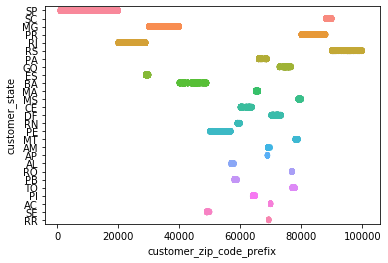

<Figure size 720x1440 with 0 Axes>

In [17]:
sns.stripplot(y='customer_state',x='customer_zip_code_prefix',data=ocd)
plt.figure(figsize=(10,20))
plt.show()
#most of the customers are from sp, MG, RJ

In [18]:
ood = pd.read_csv('new_olist_orders_dataset.csv')

In [19]:
ocd_ood=ood.merge(ocd,on='customer_id')

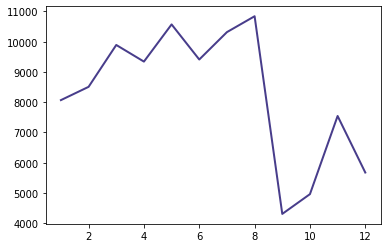

In [20]:
sns.lineplot(data=ocd_ood['purchase_mo'].value_counts().sort_index(),
             color='darkslateblue', linewidth=2)

In [21]:
oord = pd.read_csv('new_olist_order_reviews_dataset.csv')

In [22]:
oord_ocd_ood = oord.merge(ocd_ood,on='order_id')

In [23]:
oop = pd.read_csv('new_olist_order_payments_dataset.csv')

In [24]:
oop_oord_ocd_ood = oop.merge(oord_ocd_ood,on='order_id')

In [25]:
df_train = pr_oid_osd.merge(oop_oord_ocd_ood, on='order_id')

In [26]:
df_train

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,shipping_limit_date_yr,...,delivered_customer_hr,delivered_customer_mi,delivered_customer_sec,estimated_delivery_yr,estimated_delivery_mo,estimated_delivery_dy,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,2017,...,16.000000,7.000000,13.000000,2017,9,1,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,2017,...,16.000000,57.000000,44.000000,2017,5,30,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,2017,...,16.000000,51.000000,26.000000,2017,9,20,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,118.90,26.68,2017,...,16.000000,51.000000,26.000000,2017,9,20,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,2017,...,23.000000,26.000000,35.000000,2017,12,4,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,2017,...,15.000000,34.000000,28.000000,2017,3,28,12072fd221c97ff598515f5a8b94d08e,4278,sao paulo,SP
118311,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96,2017,...,11.000000,9.000000,12.000000,2017,3,10,637ce3a8eb17677024b70124b5ff7040,92990,eldorado do sul,RS
118312,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,2017,...,16.000000,37.000000,6.000000,2017,5,3,9107bdcabca6373f0a08e83943f19df3,1404,sao paulo,SP
118313,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,12.48,2017,...,16.233778,30.194701,33.302303,2017,7,10,9f1e408ad389d00984d4f681624d04a9,93010,sao leopoldo,RS


In [27]:
df_train.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'shipping_limit_date_yr', 'shipping_limit_date_mo',
       'shipping_limit_date_dy', 'shipping_limit_date_hr',
       'shipping_limit_date_mi', 'shipping_limit_date_sec',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date_yr', 'review_creation_date_mo',
       'review_creation_date_dy', 'review_answer_timestamp_yr',
       'review_answer_timestamp_mo', 'review_answer_timestamp_dy',
       'review_answer_timestamp_hr', 'review_answer_timestamp_mi',
       'review_answe

In [28]:
#CHURN ANALYSIS
#Create a dataframe to count how many times a customer shop 
df_order = df_train.groupby(['order_id','purchase_mo','purchase_yr','customer_unique_id'], as_index=False).sum().loc[:, ['order_id','customer_unique_id','purchase_mo','purchase_yr', 'payment_value']].sort_values(by='purchase_mo', ascending=True)
df_order['time_to_shop'] = 1
df_order['time_to_shop']=df_order.groupby(['customer_unique_id']).cumcount() + 1 #cumcount() starts at 0, add 1 so that it starts at 1
#print(df_order.shape)
df_order.head(10)

#df_order['new_order']=order_customer.groupby(['customer_unique_id']).cumcount() + 1
#indices = order_customer['new_order'] != 1
#order_customer.loc[indices,'new_order'] = 0

df_order_2016 = df_order[df_order['purchase_yr']==2016]
df_order_2017 = df_order[df_order['purchase_yr']==2017]
df_order_2018 = df_order[df_order['purchase_yr']==2018]

'96% of customers only buy with Olist once, which is a big problem.

In [29]:
df_count_cust = df_order.groupby(['customer_unique_id']).count().reset_index()
df_count_cust["order_count"] = df_count_cust["order_id"]
df_count_cust = df_count_cust.drop(["order_id", "purchase_mo", "payment_value", "time_to_shop","purchase_yr"], axis=1)
df_count_cust = df_count_cust.groupby(["order_count"]).count().reset_index().rename(columns={"customer_unique_id": "num_customer"})
df_count_cust["percentage_customer"] = 100.0 * df_count_cust["num_customer"] / df_count_cust["num_customer"].sum()
df_count_cust

,order_count,num_customer,percentage_customer
0,1,92506,96.947149
1,2,2673,2.801329
2,3,192,0.201218
3,4,29,0.030392
4,5,9,0.009432
5,6,5,0.005240
6,7,3,0.003144
7,9,1,0.001048
8,16,1,0.001048


In [30]:
df_count_cust= df_order_2016.groupby(['customer_unique_id']).count().reset_index()
df_count_cust["order_count"] = df_count_cust["order_id"]
df_count_cust = df_count_cust.drop(["order_id", "purchase_mo", "payment_value", "time_to_shop"], axis=1)
df_count_cust = df_count_cust.groupby(["order_count"]).count().reset_index().rename(columns={"customer_unique_id": "num_customer"})
df_count_cust["percentage_customer"] = 100.0 * df_count_cust["num_customer"] / df_count_cust["num_customer"].sum()
df_count_cust

,order_count,num_customer,purchase_yr,percentage_customer
0,1,305,305,99.025974
1,2,3,3,0.974026


In [31]:
df_count_cust= df_order_2017.groupby(['customer_unique_id']).count().reset_index()
df_count_cust["order_count"] = df_count_cust["order_id"]
df_count_cust = df_count_cust.drop(["order_id", "purchase_mo", "payment_value", "time_to_shop"], axis=1)
df_count_cust = df_count_cust.groupby(["order_count"]).count().reset_index().rename(columns={"customer_unique_id": "num_customer"})
df_count_cust["percentage_customer"] = 100.0 * df_count_cust["num_customer"] / df_count_cust["num_customer"].sum()
df_count_cust

,order_count,num_customer,purchase_yr,percentage_customer
0,1,41998,41998,97.161365
1,2,1130,1130,2.614228
2,3,78,78,0.180451
3,4,13,13,0.030075
4,5,4,4,0.009254
5,6,1,1,0.002313
6,9,1,1,0.002313


In [32]:
df_count_cust= df_order_2018.groupby(['customer_unique_id']).count().reset_index()
df_count_cust["order_count"] = df_count_cust["order_id"]
df_count_cust = df_count_cust.drop(["order_id", "purchase_mo", "payment_value", "time_to_shop", 'purchase_yr'], axis=1)
df_count_cust = df_count_cust.groupby(["order_count"]).count().reset_index().rename(columns={"customer_unique_id": "num_customer"})
df_count_cust["percentage_customer"] = 100.0 * df_count_cust["num_customer"] / df_count_cust["num_customer"].sum()
df_count_cust

,order_count,num_customer,percentage_customer
0,1,51441,97.861695
1,2,1057,2.010844
2,3,55,0.104632
3,4,8,0.015219
4,5,2,0.003805
5,6,1,0.001902
6,7,1,0.001902


Rootcause Analysis

Why 96% of customers shop with us only once? Key factors include

    Price
    Customer Experience - proxy by Review
    Delivery Duration

**Since we have review scores and order delivery time, we will focus here first.

In [33]:
df_quality = df_train.groupby(['purchase_yr','purchase_mo'], as_index=False).mean().loc[:, ['purchase_yr','purchase_mo','expected_duration','ship_duration', 'tocarrier_duration', 'lastmile_duration','expected_vs_shipdate','review_score']]
df_quality.head(10)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['expected_duration', 'ship_duration', 'tocarrier_duration',\n       'lastmile_duration', 'expected_vs_shipdate'],\n      dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
'''
State features

    I will explore the Customers and sellers states;
    Also, the distribution of price and freight values between states;

'''
total = len(df_train)
plt.figure(figsize=(16,12))
df_train['price_log'] = np.log(df_train['price'] + 1.5)
plt.suptitle('CUSTOMER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_train, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [ ]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_train, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [ ]:

'''Order Item Id

    I think that this column is the total items bought.
    Let's explore the distribution of this feature'''


df_train['ord_new'] = df_train['order_item_id'].copy()

df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
df_train.loc[(df_train['order_item_id'] > 10), 'ord_new'] = '10 to 20'

In [ ]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=df_train)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=df_train, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("State Name Short", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [ ]:
df_train['order_process_time'] = df_train['delivered_customer_dy'] - df_train['purchase_dy']

order_time_by_category = pd.DataFrame(df_train['order_process_time'].groupby(df_train['product_category_name_english']).median(numeric_only=False).sort_values(ascending=True)[:10])

#Visualiasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'])
plt.title('Top 10 Fastest Product Category Order Time',fontsize=20)
plt.xlabel('Order Time (Day)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

In [ ]:
order_time_by_category = pd.DataFrame(df_train['order_process_time'].groupby(df_train['product_category_name_english']).median(numeric_only=False).sort_values(ascending=False)[:10])
#Visualiasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'])
plt.title('Top 10 Slowest Product Category Order Time',fontsize=20)
plt.xlabel('Order Time (Day)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

In [ ]:
order_count_by_month = df_train['order_item_id'].groupby(df_train['purchase_mo']).sum()

#Visualisasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_count_by_month.values, x=order_count_by_month.index, color="Salmon")
plt.title('Monthly Order',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount Order',fontsize=17)

In [ ]:
revenue_count_by_month = df_train['payment_value'].groupby(df_train['purchase_mo']).sum()
#Visualisas
fig=plt.figure(figsize=(16,9))
sns.barplot(y=revenue_count_by_month.values, x=revenue_count_by_month.index, color="Salmon")
plt.title('Monthly Revenue',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount Revenue',fontsize=17)


In [ ]:
customer_active_by_month = df_train.groupby('purchase_mo')['customer_unique_id'].nunique().reset_index()

#Visualisasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=customer_active_by_month['customer_unique_id'], x=customer_active_by_month['purchase_mo'], color="Salmon")
plt.title('Monthly Active User',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount of User',fontsize=17)

In [ ]:
df_train['delay'] = (df_train['delivered_customer_dy'] - df_train['estimated_delivery_dy'])
df_train['deliver'] = (df_train['delivered_customer_dy'] - df_train['approved_dy'])
df_train['delay'] = df_train['delay'].fillna(0)
df_train['deliver'] = df_train['deliver'].fillna(0)
print(df_train['delay'].sort_values(ascending=False).head())
sns.kdeplot(df_train['delay'])
sns.kdeplot(df_train['deliver'])

In [ ]:
order_p = df_train['purchase_hr']
order_a = df_train['approved_hr']
# difference time in payment (in hours)
df_train['difference_time_payment']= (order_a - order_p)

In [ ]:
#Median Payment Confirmation Time (in minutes)
k = df_train.groupby(['payment_type'])['difference_time_payment'].median().fillna(0)

ax = k.plot(kind='bar', stacked=True, figsize=(20,10))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))



In [ ]:
S1=pd.Series(data=df_train['customer_state'].value_counts().values,index=df_train['customer_state'].value_counts().index)
S2=pd.Series(data=df_train['seller_state'].value_counts().values,index=df_train['seller_state'].value_counts().index)
dfz1=pd.DataFrame(data=S1,index=S1.index,columns=['Customers'])
dfz1['Sellers']=S2
dfz1.dropna().plot.bar(figsize=(15,7))
plt.title('No of Sellers VS Buyers per State')
plt.xlabel('States')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(14,8))

product_weight_g_reg = df_train.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['product_weight_g']
freight_value_reg = df_train.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha':0.7, 'color':'skyblue'},\
           line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Weight Scatterplot'.title(), fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))

product_weight_g_reg = df_train.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['product_weight_g']
freight_value_reg = df_train.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha':0.7, 'color':'skyblue'},\
           line_kws={'color':'red'});

plt.xlim(0, 200000)

plt.title('Freight Value Vs. Product Weight Scatterplot'+'\n'+'Zoomed on Product Weight Between 0g and 200000g', fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# alot of outliers for the product weight
plt.figure(figsize=(14,8))
sns.boxplot(x=product_weight_g_reg, color='skyblue');

plt.title('Boxplot For The Product Weights', fontsize=18);
plt.xlabel('Product Weight'.title(), fontsize=12);

In [ ]:
#taking up to the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(x=product_weight_g_reg[product_weight_g_reg < product_weight_g_reg.quantile(0.90)], color='skyblue');
plt.title('Boxplot For The Product Weights', fontsize=18);
plt.xlabel('Product Weight'.title(), fontsize=12);

In [ ]:
# altot of outliers in the freight value, we will be taking the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(freight_value_reg, color='skyblue');

plt.title('Boxplot For The Freight Value', fontsize=18);
plt.xlabel('Freight Value'.title(), fontsize=12);

In [ ]:
#taking up to the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(freight_value_reg[freight_value_reg < freight_value_reg.quantile(0.90)], color='skyblue');

plt.title('Boxplot For The Freight Value', fontsize=18);
plt.xlabel('Freight Value'.title(), fontsize=12);

In [ ]:
weight_freight_reg = pd.DataFrame({'product_weights':product_weight_g_reg, 'freight_value':freight_value_reg})
# ploting the regresion line with the 90% quantile, we can still see that a linear regression does not fit it well
plt.figure(figsize=(14,8))

quantile_weight_freight_reg = weight_freight_reg[weight_freight_reg < weight_freight_reg.quantile(0.9)]

sns.regplot(quantile_weight_freight_reg['product_weights'] ,quantile_weight_freight_reg['freight_value'],\
            scatter_kws={'alpha':0.2, 'color':'skyblue'},\
            line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Weight Scatterplot'+'\n'+'Using 90% Quantile' , fontsize=18);
plt.ylabel('Freight Value'.title(), fontsize=12);
plt.xlabel('Product Weight'.title(), fontsize=12);

In [ ]:
# is there any relationship between the price of the order and the price of the freight? no
payment_vs_freight_df = df_train.groupby('customer_id').sum().reset_index()[['payment_value','freight_value']]

In [ ]:
plt.figure(figsize=(14,8))
sns.regplot(data=payment_vs_freight_df, x=payment_vs_freight_df.payment_value, y=payment_vs_freight_df.freight_value,
            scatter_kws={'alpha':0.7, 'color':'skyblue'}, line_kws={'color':'red'});
plt.xlim(0,20000);

plt.title('Payment Vs. Freight value'.title(), fontsize=20);
plt.ylabel('Freight value'.title(), fontsize=14);
plt.xlabel('Payment Value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df_train.groupby(['purchase_yr','purchase_mo']).sum()['payment_value']

In [ ]:
multivariable_plot_df = df_train.groupby(['purchase_yr','purchase_mo']).sum()['payment_value'].reset_index()
multivariable_plot_df

In [ ]:
g = sns.FacetGrid(data=multivariable_plot_df, row = 'purchase_yr', height=7, aspect=2.5, sharey=True)

g = g.map(plt.bar, 'purchase_mo', 'payment_value', color='skyblue')
g.set_titles( size=20);
g.set_ylabels('Payment Value'.title(), size=14);
g.set_xlabels('months'.title(), size=14);

In [ ]:
new.isna().sum()

In [ ]:
new.dtypes

In [ ]:
new.seller_city.nunique()

In [ ]:
new.seller_state.nunique()

In [ ]:
new.customer_city.nunique()

In [ ]:
new.customer_state.nunique()

In [ ]:
#because geolocation state and customer state are samethings
new.rename(columns = {'customer_state':'geolocation_state'}, inplace = True)

In [188]:
new

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,shipping_limit_date_yr,...,delivered_customer_hr,delivered_customer_mi,delivered_customer_sec,estimated_delivery_yr,estimated_delivery_mo,estimated_delivery_dy,customer_unique_id,customer_zip_code_prefix,customer_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,2017,...,16.000000,7.000000,13.000000,2017,9,1,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,2017,...,16.000000,57.000000,44.000000,2017,5,30,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,2017,...,16.000000,51.000000,26.000000,2017,9,20,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,118.90,26.68,2017,...,16.000000,51.000000,26.000000,2017,9,20,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,2017,...,23.000000,26.000000,35.000000,2017,12,4,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,2017,...,15.000000,34.000000,28.000000,2017,3,28,12072fd221c97ff598515f5a8b94d08e,4278,sao paulo,SP
118311,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96,2017,...,11.000000,9.000000,12.000000,2017,3,10,637ce3a8eb17677024b70124b5ff7040,92990,eldorado do sul,RS
118312,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,2017,...,16.000000,37.000000,6.000000,2017,5,3,9107bdcabca6373f0a08e83943f19df3,1404,sao paulo,SP
118313,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,12.48,2017,...,16.233778,30.194701,33.302303,2017,7,10,9f1e408ad389d00984d4f681624d04a9,93010,sao leopoldo,RS


In [189]:
og = pd.read_csv('new_olist_geolocation_dataset.csv')
og

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [193]:
neww = new.merge(og,on='geolocation_state')
# at last i got memory error with 12 gb of ram if you have more ram you can run it

MemoryError: Unable to allocate 187. GiB for an array with shape (25051318268,) and data type int64

In [ ]:
cat /proc/sys/vm/overcommit_memory